In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [6]:
df_Pol = df[df['job_country']=='Poland'].dropna(subset=['salary_year_avg']).copy()

In [30]:
job_titles = df_Pol['job_title_short'].value_counts().index[:6].tolist()

In [31]:
df_Pol_top6 = df_Pol[df_Pol['job_title_short'].isin(job_titles)].copy()

In [32]:
job_order = df_Pol_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

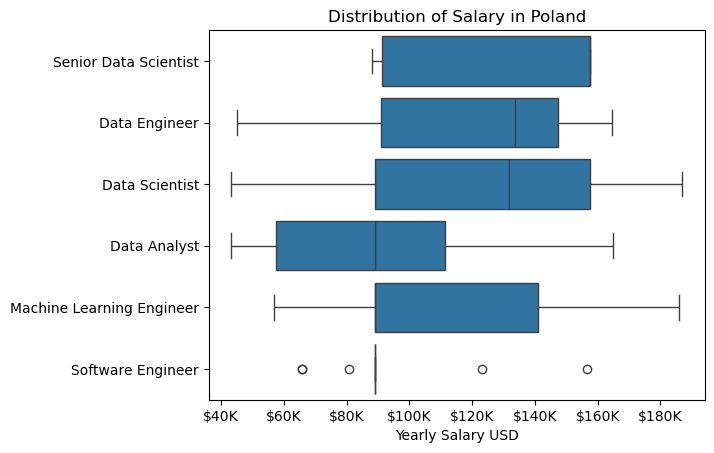

In [33]:
sns.boxplot(data=df_Pol_top6, x='salary_year_avg', y='job_title_short', order= job_order)

plt.xlabel("Yearly Salary USD")
plt.title('Distribution of Salary in Poland')
plt.ylabel('')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.show()

In [ ]:
df_Pol_DA = df_Pol[((df_Pol['job_title_short'] == 'Data Analyst') | (df_Pol['job_title_short'] == 'Senior Data Analyst'))].copy()

In [40]:
df_Pol_DA = df_Pol_DA.explode('job_skills')